In [1]:
import json
from pathlib import Path

import numpy as np
from scipy.stats import bootstrap, gmean
from matplotlib import pyplot as plt
from tqdm import tqdm

100%|██████████| 20/20 [00:00<00:00, 93.80it/s]
/tmp/ipykernel_137721/2818117174.py:5: RuntimeWarning: Mean of empty slice
  mean_stat = lambda x, axis: np.nanmean(x, axis=axis)
100%|██████████| 20/20 [00:00<00:00, 104.05it/s]


Text(-0.1, 1.05, '(b)')

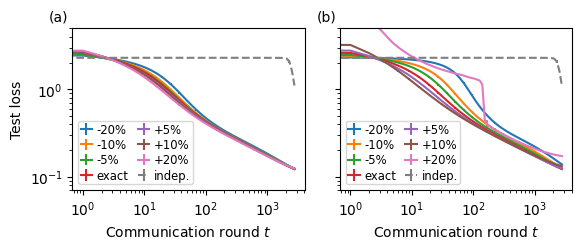

In [5]:
fig, (ax1, ax2) = plt.subplots(ncols=2, nrows=1, figsize=(5.0, 2.1),
                                 sharey="row",
                                 gridspec_kw={"wspace": 0.15, "hspace": 0.45, "left": 0.0, "right": 1.0})

mean_stat = lambda x, axis: np.nanmean(x, axis=axis)
errorevery = 3

scenario = "estimates-filtered"
gains = ["7.16", "7.59", "7.80", "8.00", "8.20", "8.40", "8.76"]
labels = ["-20%", "-10%", "-5%", "exact", "+5%", "+10%", "+20%"]
for gain, label in zip(gains, labels):
    files = list(Path(f"../logs/{scenario}/").glob(f"gain-{gain}-seed-*.jsonl"))
    all_mean_losses = []
    all_rounds = []
    for fn in tqdm(files):
        rounds = []
        mean_losses = []
        with open(fn) as f:
            for line in f:
                try:
                    res = json.loads(line)
                except json.JSONDecodeError:
                    continue
                rounds.append(res["round"])
                mean_losses.append(np.mean(list(res["test_losses"].values())))
        all_mean_losses.append(mean_losses+[np.nan]*(91-len(mean_losses)))
        all_rounds.append(rounds)
    rs = max(all_rounds, key=len)
    # print(rs)
    # yerr = bootstrap(all_mean_losses, statistic=lambda *x, axis: np.mean(x, axis=axis), n_resamples=100, vectorized=True, axis=0) - np.nanmean(all_mean_losses, axis=0)
    # yerr = np.nanpercentile(all_mean_losses, [2.5, 97.5], axis=0) - np.nanmean(all_mean_losses, axis=0)
    # yerr = np.abs(yerr)[:, :len(rs)]
    yerr = 1.96*(np.nanstd(all_mean_losses, axis=0)/np.sum(~np.isinf(all_mean_losses), axis=0)**0.5)[:len(rs)]
    yerr[yerr > 1] = 0
    ax1.errorbar(rs, mean_stat(all_mean_losses, axis=0)[:len(rs)],
                 yerr=yerr,
                 errorevery=errorevery,
                 label=label)


gain = "1.00"
label = "indep."
files = list(Path(f"../logs/{scenario}/").glob(f"gain-{gain}-seed-*.jsonl"))
all_mean_losses = []
all_rounds = []
for fn in tqdm(files):
    rounds = []
    mean_losses = []
    with open(fn) as f:
        for line in f:
            try:
                res = json.loads(line)
            except json.JSONDecodeError:
                continue
            rounds.append(res["round"])
            mean_losses.append(np.mean(list(res["test_losses"].values())))
    all_mean_losses.append(mean_losses+[np.nan]*(91-len(mean_losses)))
    all_rounds.append(rounds)
rs = max(all_rounds, key=len)
# print(rs)
# yerr = bootstrap(all_mean_losses, statistic=lambda *x, axis: np.mean(x, axis=axis), n_resamples=100, vectorized=True, axis=0) - np.nanmean(all_mean_losses, axis=0)
# yerr = np.nanpercentile(all_mean_losses, [2.5, 97.5], axis=0) - np.nanmean(all_mean_losses, axis=0)
# yerr = np.abs(yerr)[:, :len(rs)]
yerr = 1.96*(np.nanstd(all_mean_losses, axis=0)/np.sum(~np.isinf(all_mean_losses), axis=0)**0.5)[:len(rs)]
yerr[yerr > 1] = 0
ax1.errorbar(rs, mean_stat(all_mean_losses, axis=0)[:len(rs)],
             yerr=yerr,
             ls="--",
             errorevery=errorevery,
             label=label)




scenario = "estimates-filtered"
gains = ["5.28", "6.50", "7.21", "8.00", "8.76", "9.85", "12.13"]
labels = ["-20%", "-10%", "-5%", "exact", "+5%", "+10%", "+20%"]
for gain, label in zip(gains, labels):
    files = list(Path(f"../logs/{scenario}/").glob(f"gain-{gain}-seed-*.jsonl"))
    all_mean_losses = []
    all_rounds = []
    for fn in tqdm(files):
        rounds = []
        mean_losses = []
        with open(fn) as f:
            for line in f:
                try:
                    res = json.loads(line)
                except json.JSONDecodeError:
                    continue
                rounds.append(res["round"])
                mean_losses.append(np.mean(list(res["test_losses"].values())))
        all_mean_losses.append(mean_losses+[np.nan]*(91-len(mean_losses)))
        all_rounds.append(rounds)
    rs = max(all_rounds, key=len)
    # print(rs)
    # yerr = bootstrap(all_mean_losses, statistic=lambda *x, axis: np.mean(x, axis=axis), n_resamples=100, vectorized=True, axis=0) - np.nanmean(all_mean_losses, axis=0)
    # yerr = np.nanpercentile(all_mean_losses, [2.5, 97.5], axis=0) - np.nanmean(all_mean_losses, axis=0)
    # yerr = np.abs(yerr)[:, :len(rs)]
    yerr = 1.96*(np.nanstd(all_mean_losses, axis=0)/np.sum(~np.isinf(all_mean_losses), axis=0)**0.5)[:len(rs)]
    yerr[yerr > 1] = 0
    ax2.errorbar(rs, mean_stat(all_mean_losses, axis=0)[:len(rs)],
                 yerr=yerr,
                 errorevery=errorevery,
                 label=label)


gain = "1.00"
label = "indep."
files = list(Path(f"../logs/{scenario}/").glob(f"gain-{gain}-seed-*.jsonl"))
all_mean_losses = []
all_rounds = []
for fn in tqdm(files):
    rounds = []
    mean_losses = []
    with open(fn) as f:
        for line in f:
            try:
                res = json.loads(line)
            except json.JSONDecodeError:
                continue
            rounds.append(res["round"])
            mean_losses.append(np.mean(list(res["test_losses"].values())))
    all_mean_losses.append(mean_losses+[np.nan]*(91-len(mean_losses)))
    all_rounds.append(rounds)
rs = max(all_rounds, key=len)
# print(rs)
# yerr = bootstrap(all_mean_losses, statistic=lambda *x, axis: np.mean(x, axis=axis), n_resamples=100, vectorized=True, axis=0) - np.nanmean(all_mean_losses, axis=0)
# yerr = np.nanpercentile(all_mean_losses, [2.5, 97.5], axis=0) - np.nanmean(all_mean_losses, axis=0)
# yerr = np.abs(yerr)[:, :len(rs)]
yerr = 1.96*(np.nanstd(all_mean_losses, axis=0)/np.sum(~np.isinf(all_mean_losses), axis=0)**0.5)[:len(rs)]
yerr[yerr > 1] = 0
ax2.errorbar(rs, mean_stat(all_mean_losses, axis=0)[:len(rs)],
             yerr=yerr,
             ls="--",
             errorevery=errorevery,
             label=label)




ax1.set_ylim(0.07, 5)
# ax1.set_xlim(1, 200)
ax1.set_xscale("log")
ax1.set_yscale("log")
ax1.set_ylabel("Test loss")
ax1.set_xlabel("Communication round $t$")

ax2.set_ylim(0.07, 5)
# ax2.set_xlim(1, 200)
ax2.set_xscale("log")
ax2.set_yscale("log")
ax2.set_xlabel("Communication round $t$")

ax2.legend(ncols=2, fontsize="small",
           borderpad=0.2, labelspacing=0.2,
           handlelength=1.0, handletextpad=0.4,
           columnspacing=0.8)
ax1.legend(ncols=2, fontsize="small",
           borderpad=0.2, labelspacing=0.2,
           handlelength=1.0, handletextpad=0.4,
           columnspacing=0.8)

ax1.text(-0.1, 1.05, "(a)",
         transform=ax1.transAxes)
ax2.text(-0.1, 1.05, "(b)",
         transform=ax2.transAxes)

In [6]:
fig.savefig("fig_estimates.pdf", bbox_inches="tight")